In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [14]:
X = df.drop(columns=["BMI", "Outcome"])
y = df["BMI"]

y = y.values.reshape(-1, 1)
X = X.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

# 간단한 선형 회귀 모델로 학습 및 평가
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# 선형 회귀 모델의 성능 확인
print("--- Linear Regression Performance ---")
print(f"Test R-squared (R²): {r2_score(y_test, y_pred_lr):.4f}")

--- Linear Regression Performance ---
Test R-squared (R²): 0.1675


In [25]:
# -------------------------------------------------
# 5) 모델 정의 (작고 탄탄한 MLP)
# -------------------------------------------------
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mean_squared_error',
    metrics=['mae']
)
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# -------------------------------------------------
# 7) 학습
# -------------------------------------------------
model_history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1122.5304 - mae: 32.6108 - val_loss: 1069.6481 - val_mae: 31.6058
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1053.8606 - mae: 31.5904 - val_loss: 1038.9055 - val_mae: 31.1135
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1071.4242 - mae: 31.6884 - val_loss: 1002.7291 - val_mae: 30.5279
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1031.8175 - mae: 31.0938 - val_loss: 958.2266 - val_mae: 29.7917
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 984.8857 - mae: 30.3986 - val_loss: 903.1166 - val_mae: 28.8517
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 892.3010 - mae: 28.8959 - val_loss: 834.5433 - val_mae: 27.6397
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 809.4952 - mae: 27.3996 - val_loss: 753.5340 - val_mae: 26.1322
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 688.2928 - mae: 25.0528 - val_loss: 661.2361 - val_mae: 24.2968
Epoch 9/20
16/1

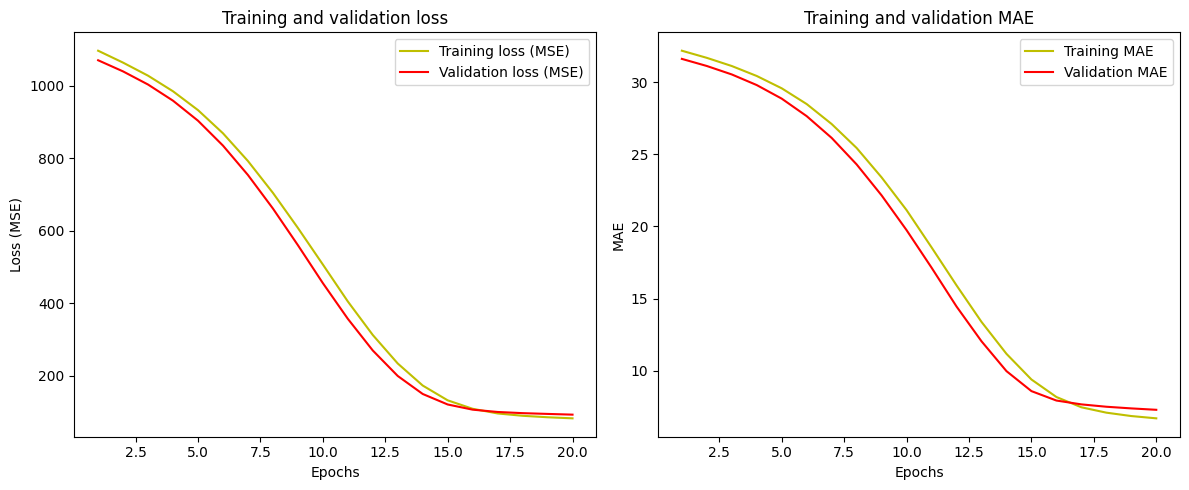

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test MSE: 1028.8395
Test MAE: 31.1360
Test R-squared (R²): -16.3337


In [26]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'y', label='Training loss (MSE)')
plt.plot(epochs, val_loss, 'r', label='Validation loss (MSE)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE 시각화
mae = model_history.history['mae']
val_mae = model_history.history['val_mae']
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------------------------------
# 9) 테스트 데이터로 최종 평가
# -------------------------------------------------
y_pred = model.predict(X_test_scaled)

# [변경점 4] 회귀 성능 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R-squared (R²): {r2:.4f}")